In [ ]:
import numpy as np
import pandas as pd
import re
pd.set_option('display.max_columns', None)

# 모델링

## K-Means 클러스터링

In [ ]:
# !pip install yellowbrick

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
df_md = pd.read_excel("D:/clean_data", sheet_name="raw")

In [ ]:
df_md = df_md.loc[:,['착한가격업소','가격 리뷰 비율','서비스 리뷰 비율','위생 리뷰 비율']]    #착한가격업소 기준 관련 리뷰 선택, 모델에 적용한 변수들 추출

In [ ]:
X = df_md.loc[:,['가격 리뷰 비율','서비스 리뷰 비율','위생 리뷰 비율']]    #모델 변수

In [ ]:
#inertia에 따른 최적의 군집 개수(K) 정하기

inertia = []

for i in range(1, 15):
    km = KMeans(
        n_clusters = i,
        init = 'k-means++',
        n_init = 10,
        random_state = 0)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(4,4))

plt.plot(range(1, 15), inertia, marker='*')

plt.xlabel('N of clusters')
plt.ylabel('Inertia')

plt.show()

In [ ]:
#K=4로 군집분석 진행
k=4

km = KMeans(
    n_clusters = k,
    init = 'k-means++',
    n_init = 10,
    random_state = 42
    )

y_pred = km.fit_predict(X)

df_km = df_md.copy()
df_km['군집'] = y_pred

In [ ]:
df_km

In [ ]:
#각 군집의 착한가격업소 개수 확인
for i in range(k):
    print(f'{i} 군집\n',df_km[df_km['군집']==i]['착한가격업소'].value_counts(),'\n')

In [ ]:
#K=3으로 군집분석 진행
k=3

km = KMeans(
    n_clusters = k,
    init = 'k-means++',
    n_init = 10,
    random_state = 42
    )

y_pred = km.fit_predict(X)

df_km = df_md.copy()
df_km['군집'] = y_pred

In [ ]:
#각 군집의 착한가격업소 개수 확인
for i in range(k):
    print(f'{i} 군집\n',df_km[df_km['군집']==i]['착한가격업소'].value_counts(),'\n')

In [ ]:
#실루엣 스코어
score = silhouette_score(X,
                         km.labels_,
                         metric = 'euclidean')

print("Silhouetter 점수: %.5f" % score)

In [ ]:
#실루엣 스코어 시각화
visualizer = SilhouetteVisualizer(km,
                                  colors='yellowbrick')

visualizer.fit(X)

visualizer.show()

In [ ]:
#군집별 리뷰 비율
fig = make_subplots(rows=1, cols=3, subplot_titles=("가격 리뷰 비율", "서비스 리뷰 비율", "위생 리뷰 비율"))

fig.add_trace(go.Box(
    x=df_km['군집'],
    y=df_km['가격 리뷰 비율'],
    boxpoints='all',
    jitter=0.3,
    marker_size=1,
    ),
    row=1, col=1,
)

fig.add_trace(go.Box(
    x=df_km['군집'],
    y=df_km[df_km['착한가격업소']=='o']['가격 리뷰 비율'],
    boxpoints='all',
    jitter=0.3,
    marker_size=3,
    marker_color='#ef553b',
    line_width=0,
    fillcolor='rgba(0,0,0,0)'
    ),
    row=1, col=1,
)

fig.add_trace(go.Box(
    x=df_km['군집'],
    y=df_km['서비스 리뷰 비율'],
    boxpoints='all',
    jitter=0.3,
    marker_size=1,
    ),
    row=1, col=2,
)

fig.add_trace(go.Box(
    x=df_km['군집'],
    y=df_km[df_km['착한가격업소']=='o']['서비스 리뷰 비율'],
    boxpoints='all',
    jitter=0.3,
    marker_size=3,
    marker_color='#ef553b',
    line_width=0,
    fillcolor='rgba(0,0,0,0)'
    ),
    row=1, col=2,
)

fig.add_trace(go.Box(
    x=df_km['군집'],
    y=df_km['위생 리뷰 비율'],
    boxpoints='all',
    jitter=0.3,
    marker_size=1,
    ),
    row=1, col=3,
)

fig.add_trace(go.Box(
    x=df_km['군집'],
    y=df_km[df_km['착한가격업소']=='o']['위생 리뷰 비율'],
    boxpoints='all',
    jitter=0.3,
    marker_size=3,
    marker_color='#ef553b',
    line_width=0,
    fillcolor='rgba(0,0,0,0)'
    ),
    row=1, col=3,
)

fig.update_layout(width=1500,height=400,
                  margin=dict(r=20, b=10, l=10,t=40),
                  showlegend=False,
                  )

In [ ]:
# fig = sns.pairplot(df_km,hue='군집')

In [ ]:
#변수간 scatter plot
fig = make_subplots(rows=1, cols=3,
                   horizontal_spacing = 0.1)

#가격 - 서비스
fig = fig.add_trace(go.Scatter(
        x=df_km[df_km['착한가격업소']=='x']['가격 리뷰 비율'],
        y=df_km[df_km['착한가격업소']=='x']['서비스 리뷰 비율'],
        mode='markers',
        marker=dict(
            size=4,
            color=df_km[df_km['착한가격업소']=='x']['군집'],
            opacity=0.5
        ),
    ),
    row=1, col =1,
)

fig.add_trace(go.Scatter(
        x=df_km[df_km['착한가격업소']=='o']['가격 리뷰 비율'],
        y=df_km[df_km['착한가격업소']=='o']['서비스 리뷰 비율'],
        mode='markers',
        marker=dict(
            size=7,
            color='LimeGreen',
            opacity=0.8
        ),
    ),
    row=1, col =1,
)

#가격-위생
fig = fig.add_trace(go.Scatter(
        x=df_km[df_km['착한가격업소']=='x']['가격 리뷰 비율'],
        y=df_km[df_km['착한가격업소']=='x']['위생 리뷰 비율'],
        mode='markers',
        marker=dict(
            size=4,
            color=df_km[df_km['착한가격업소']=='x']['군집'],
            opacity=0.5
        ),
    ),
    row=1, col =2,
)

fig.add_trace(go.Scatter(
        x=df_km[df_km['착한가격업소']=='o']['가격 리뷰 비율'],
        y=df_km[df_km['착한가격업소']=='o']['위생 리뷰 비율'],
        mode='markers',
        marker=dict(
            size=7,
            color='LimeGreen',
            opacity=0.8
        ),
    ),
    row=1, col =2,
)

#서비스-위생
fig = fig.add_trace(go.Scatter(
        x=df_km[df_km['착한가격업소']=='x']['서비스 리뷰 비율'],
        y=df_km[df_km['착한가격업소']=='x']['위생 리뷰 비율'],
        mode='markers',
        marker=dict(
            size=4,
            color=df_km[df_km['착한가격업소']=='x']['군집'],
            opacity=0.5
        ),
    ),
    row=1, col =3,
)

fig.add_trace(go.Scatter(
        x=df_km[df_km['착한가격업소']=='o']['서비스 리뷰 비율'],
        y=df_km[df_km['착한가격업소']=='o']['위생 리뷰 비율'],
        mode='markers',
        marker=dict(
            size=7,
            color='LimeGreen',
            opacity=0.8
        ),
    ),
    row=1, col =3,
)

fig.update_layout(width=1600,height=500,
                  margin=dict(b=40, t=40),
                  showlegend=False
                 )

fig.update_xaxes(title_text="가격 리뷰 비율", row=1, col=1)
fig.update_yaxes(title_text="서비스 리뷰 비율", row=1, col=1)
fig.update_xaxes(title_text="가격 리뷰 비율", row=1, col=2)
fig.update_yaxes(title_text="위생 리뷰 비율", row=1, col=2)
fig.update_xaxes(title_text="서비스 리뷰 비율", row=1, col=3)
fig.update_yaxes(title_text="위생 리뷰 비율", row=1, col=3)

fig.show()

In [ ]:
# 3D Scatter
fig = go.Figure()

fig = go.Figure(data=[go.Scatter3d(
    x=df_km['가격 리뷰 비율'],
    y=df_km['서비스 리뷰 비율'],
    z=df_km['위생 리뷰 비율'],
    mode='markers',
    marker=dict(
        size=2,
        color=df_km['군집'],
        opacity=0.5
    ),
    name = '전체 음식점'
)])

fig.add_trace(go.Scatter3d(
    x=df_km[df_km['착한가격업소']=='o']['가격 리뷰 비율'],
    y=df_km[df_km['착한가격업소']=='o']['서비스 리뷰 비율'],
    z=df_km[df_km['착한가격업소']=='o']['위생 리뷰 비율'],
    mode='markers',
    marker=dict(
        size=3,
        color='limegreen',
        opacity=1
    ),
    name = '착한가격업소'
))

fig.update_layout(scene = dict(
                  xaxis_title='가격 리뷰 비율',
                  yaxis_title='서비스 리뷰 비율',
                  zaxis_title='위생 리뷰 비율'),
                  width=1000,
                  height=700,
                  margin=dict(r=20, b=10, l=10, t=10)
                 )
# fig.write_html(f'./3dScatterPlot.html',full_html=False,include_plotlyjs='cdn')

fig.show()

In [ ]:
#군집간 상대적 거리 시각화
visualizer = InterclusterDistance(km, legend=False)
visualizer.fit(X)
visualizer.show()

# 결과

In [ ]:
#1번 군집 데이터프레임 분리
df_통합_cl1 = df_통합_clean[df_km['군집'] == 1]
df_통합_cl1.columns

Index(['인덱스', '시도', '시군', '업종', '업소명', '착한가격업소', '별점', '방문자 리뷰수', '블로그 리뷰수',
       '키워드리뷰수', '"음식이 맛있어요"', '"가성비가 좋아요"', '"친절해요"', '"양이 많아요"',
       '"재료가 신선해요"', '"특별한 메뉴가 있어요"', '"매장이 넓어요"', '"매장이 청결해요"', '"혼밥하기 좋아요"',
       '"화장실이 깨끗해요"', '"인테리어가 멋져요"', '"단체모임 하기 좋아요"', '"주차하기 편해요"', '"뷰가 좋아요"',
       '"특별한 날 가기 좋아요"', '"좌석이 편해요"', '"환기가 잘 돼요"', '"디저트가 맛있어요"',
       '"커피가 맛있어요"', '"음료가 맛있어요"', '"대화하기 좋아요"', '"사진이 잘 나와요"', '"반찬이 잘 나와요"',
       '"포장이 깔끔해요"', '"현지 맛에 가까워요"', '"메뉴 구성이 알차요"', '"고기 질이 좋아요"',
       '"직접 잘 구워줘요"', '"깨끗해요"', '"조용히 쉬기 좋아요"', '"대중교통이 편해요"',
       '"반려동물과 가기 좋아요"', '"아늑해요"', '"음식이 빨리 나와요"', '"차분한 분위기에요"', '"술이 다양해요"',
       '"빵이 맛있어요"', '"건강한 맛이에요"', '"야외 공간이 멋져요"', '"컨셉이 독특해요"', '"아이와 가기 좋아요"',
       '"혼술하기 좋아요"', '"잡내가 적어요"', '"향신료가 강하지 않아요"', '"오래 머무르기 좋아요"',
       '"화장실이 잘 되어있어요"', '"코스요리가 알차요"', '"기본 안주가 좋아요"', '"비싼 만큼 가치있어요"',
       '"음악이 좋아요"', '"가격이 합리적이에요"', '"종류가 다양해요"', '"차가 맛있어요"', '"위생적이에요"',
       '"샐러드바가 잘 되어있어요"', '"신선해요"', '"맛있어요"'

In [ ]:
df_통합_cl1.shape

(1084, 79)

In [ ]:
df_통합_cl1['착한가격업소'].value_counts()

x    1008
o      76
Name: 착한가격업소, dtype: int64

In [ ]:
df_통합_cl1 = df_통합_cl1.loc[:,['착한가격업소','시군','업소명','별점','방문자 리뷰수','블로그 리뷰수','키워드리뷰수']]
df_통합_cl1 = df_통합_cl1[df_통합_cl1['착한가격업소'] == 'x']
df_통합_cl1

,착한가격업소,시군,업소명,별점,방문자 리뷰수,블로그 리뷰수,키워드리뷰수
107,x,제주시,일품순두부한림점,4.37,377,33,324.0
109,x,제주시,쉬멍해장국,4.10,147,169,135.0
110,x,제주시,수빈이네제주밥상,4.57,57,9,65.0
...,...,...,...,...,...,...,...
3042,x,서귀포시,유림향,4.63,68,43,45.0
3046,x,서귀포시,대유가든,4.76,32,10,45.0
3062,x,서귀포시,뽈살집제주본점,4.63,"1,779","1,083",2987.0


In [ ]:
df_통합_cl1.describe()

,별점,키워드리뷰수
count,1008.000000,1008.000000
mean,4.394067,384.683532
std,0.255621,1865.920201
...,...,...
50%,4.400000,131.000000
75%,4.530000,321.250000
max,5.000000,56442.000000


In [ ]:
#1번 군집 키워드리뷰수 하위 25% 업소들 추출, 해당 업소들에게 착한가격업소 인증을 제안, 다양한 지원 제공
pd.set_option('display.max_row', 6)
df_통합_cl1[df_통합_cl1['키워드리뷰수'] <= 64]

,착한가격업소,시군,업소명,별점,방문자 리뷰수,블로그 리뷰수,키워드리뷰수
121,x,제주시,진식당,5.00,15,7,37.0
179,x,제주시,사광,3.34,37,12,46.0
180,x,제주시,태화,4.50,26,7,62.0
...,...,...,...,...,...,...,...
3024,x,서귀포시,모두아,5.00,14,12,22.0
3042,x,서귀포시,유림향,4.63,68,43,45.0
3046,x,서귀포시,대유가든,4.76,32,10,45.0


# 번외

1588.787793670555


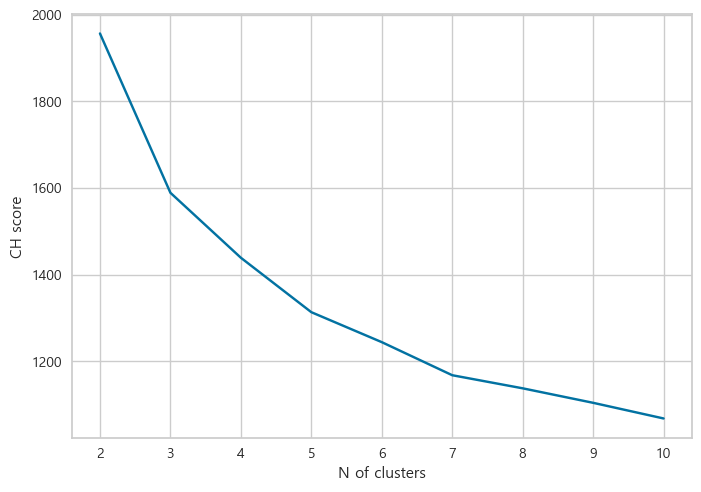

In [ ]:
#calinski_harabasz_score 확인
from sklearn.metrics import calinski_harabasz_score

print(calinski_harabasz_score(X, km.labels_))

results = {}

for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    labels = km.fit_predict(X)
    ch_score = calinski_harabasz_score(X, labels)
    results.update({i: ch_score})

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("N of clusters")
plt.ylabel("CH score")
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



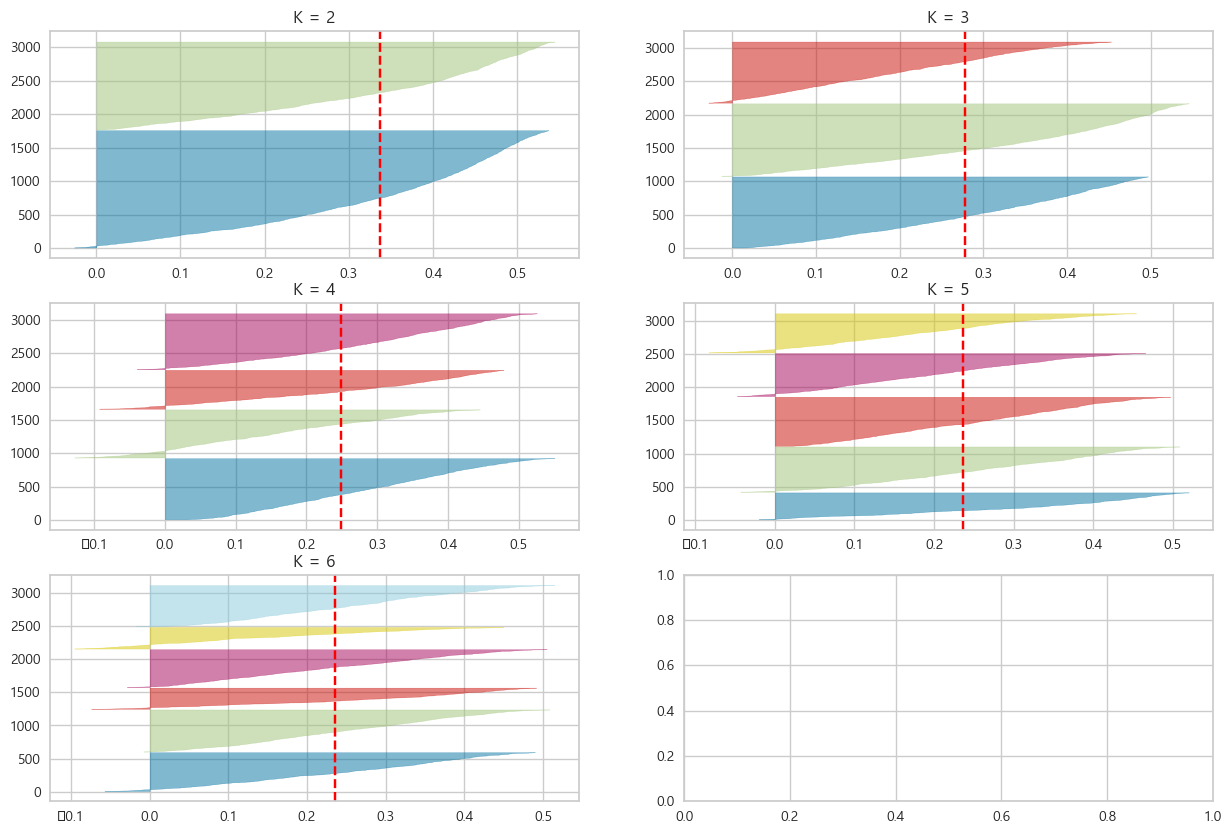

In [ ]:
#K값에 따른 실루엣 스코어 시각화
fig, ax = plt.subplots(3, 2, figsize=(15,10))

ax[0, 0].set_title("K = 2")
ax[0, 1].set_title("K = 3")
ax[1, 0].set_title("K = 4")
ax[1, 1].set_title("K = 5")
ax[2, 0].set_title("K = 6")

for i in [2, 3, 4, 5, 6]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)

    quotient, remainder = divmod(i, 2) #몫 #나머지

    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax = ax[quotient-1][remainder] #ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]
                                      )
    visualizer.fit(X)

## 병합군집(Agglomerative Clustering)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)

In [ ]:
y_pred = agg.fit_predict(X)

In [ ]:
df_agg= df_md.copy()
df_agg['군집'] = y_pred

In [ ]:
for i in range(3):
    print(f'{i} 그룹\n',df_agg[df_agg['군집']==i]['착한가격업소'].value_counts(),'\n')

0 그룹
 x    1507
o      23
Name: 착한가격업소, dtype: int64 

1 그룹
 x    1277
o      62
Name: 착한가격업소, dtype: int64 

2 그룹
 x    172
o     22
Name: 착한가격업소, dtype: int64 



In [ ]:
score = silhouette_score(X,
                         agg.labels_,
                         metric = 'euclidean')

print("Silhouetter 점수: %.5f" % score)

Silhouetter 점수: 0.25021


In [ ]:
# 3D Scatter
fig = go.Figure(data=[go.Scatter3d(
    x=df_agg['가격 리뷰 비율'],
    y=df_agg['서비스 리뷰 비율'],
    z=df_agg['위생 리뷰 비율'],
    mode='markers',
    marker=dict(
        size=2,
        color=df_agg['군집'],
        opacity=0.5
    ),
    name = '전체 음식점'
)])

fig.add_trace(go.Scatter3d(
    x=df_agg[df_agg['착한가격업소']=='o']['가격 리뷰 비율'],
    y=df_agg[df_agg['착한가격업소']=='o']['서비스 리뷰 비율'],
    z=df_agg[df_agg['착한가격업소']=='o']['위생 리뷰 비율'],
    mode='markers',
    marker=dict(
        size=3,
        color='green',
        opacity=1
    ),
    name = '착한가격업소'
))
fig.update_layout(scene = dict(
                  xaxis_title='가격 리뷰 비율',
                  yaxis_title='서비스 리뷰 비율',
                  zaxis_title='위생 리뷰 비율'),
                  width=1000,
                  height=700,
#                   margin=dict(r=20, b=10, l=10, t=10)
                 )

fig.show()

## DBSCAN

In [ ]:
# 스케일 조정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
df_dbscan= df_md.copy()
df_dbscan['군집'] = clusters
df_dbscan

,착한가격업소,가격 리뷰 비율,서비스 리뷰 비율,위생 리뷰 비율,군집
0,o,0.225352,0.154930,0.183099,0
1,o,0.139645,0.131361,0.173964,0
2,o,0.159420,0.188406,0.159420,0
3,o,0.146667,0.160000,0.186667,0
4,o,0.252212,0.132743,0.207965,0
...,...,...,...,...,...
3058,x,0.069149,0.154255,0.239362,0
3059,x,0.161435,0.174888,0.179372,0
3060,x,0.007752,0.062016,0.080103,-1
3061,x,0.125000,0.157609,0.021739,0


In [ ]:
df_dbscan['군집'].value_counts()

 0    2935
-1     123
 1       5
Name: 군집, dtype: int64

In [ ]:
df_dbscan['군집'].replace(-1,2,inplace=True)

In [ ]:
for i in range(3):
    print(f'{i} 그룹\n',df_dbscan[df_dbscan['군집']==i]['착한가격업소'].value_counts(),'\n')

0 그룹
 x    2831
o     104
Name: 착한가격업소, dtype: int64 

1 그룹
 x    5
Name: 착한가격업소, dtype: int64 

2 그룹
 x    120
o      3
Name: 착한가격업소, dtype: int64 



In [ ]:
score = silhouette_score(X_scaled,
                         clusters,
                         metric = 'euclidean')

print("Silhouetter 점수: %.5f" % score)

Silhouetter 점수: 0.26878


In [ ]:
# 3D Scatter
fig = go.Figure(data=[go.Scatter3d(
    x=df_dbscan['가격 리뷰 비율'],
    y=df_dbscan['서비스 리뷰 비율'],
    z=df_dbscan['위생 리뷰 비율'],
    mode='markers',
    marker=dict(
        size=2,
        color=df_dbscan['군집'],
        opacity=0.5
    ),
    name = '전체 음식점'
)])

fig.add_trace(go.Scatter3d(
    x=df_dbscan[df_dbscan['착한가격업소']=='o']['가격 리뷰 비율'],
    y=df_dbscan[df_dbscan['착한가격업소']=='o']['서비스 리뷰 비율'],
    z=df_dbscan[df_dbscan['착한가격업소']=='o']['위생 리뷰 비율'],
    mode='markers',
    marker=dict(
        size=3,
        color='green',
        opacity=1
    ),
    name = '착한가격업소'
))
fig.update_layout(scene = dict(
                  xaxis_title='가격 리뷰 비율',
                  yaxis_title='서비스 리뷰 비율',
                  zaxis_title='위생 리뷰 비율'),
                  width=1000,
                  height=700,
#                   margin=dict(r=20, b=10, l=10, t=10)
                 )

fig.show()